In [36]:
# Let us import hydroeval and check the version
import hydroeval
print(hydroeval.__version__)

0.1.0


In [37]:
# We will import a netcdf data for this example
# Install the netCDF4 package using the following command:
# !conda install -c conda-forge netCDF4
from netCDF4 import Dataset

In [38]:
# Let us load the observed data first
with Dataset('./catchment.obs.flow.nc', 'r', format='NETCDF4') as f:
    obs_flow = f.variables['flow'][:]  # observed streamflow series
    obs_time = f.variables['time'][:]  # timestamps for observed period
# Let us check the dimension of the observed data
print(obs_flow.shape, obs_time.shape)

(4383,) (4383,)


In [39]:
# Now, let us load the simulated data
with Dataset('./catchment.sim.flow.nc', 'r', format='NETCDF4') as f:
    sim_flow = f.variables['flow'][:]  # ensemble of simulated streamflow series
    sim_time = f.variables['time'][:]  # timestamps for simulated period
# Let us check the dimension of the simulated data
print(sim_flow.shape, sim_time.shape)

(20, 4383) (4383,)


In [40]:
import numpy
numpy.array_equal(sim_time, obs_time)

True

In [41]:
import pandas as pd
obs = pd.DataFrame(obs_time,columns=['Time'])
obs['Obs'] = pd.DataFrame(obs_flow)
obs.head()

,Time,Obs
0,1.096589e+09,4.901051
1,1.096675e+09,4.288905
2,1.096762e+09,4.481438
3,1.096848e+09,7.945478
4,1.096934e+09,4.667372


In [42]:
sim = pd.DataFrame(sim_time,columns=['Time'])
sim[['Sim1','Sim2','Sim3','Sim4','Sim5','Sim6','Sim7','Sim8','Sim9','Sim10',
    'Sim11','Sim12','Sim13','Sim14','Sim15','Sim16','Sim17','Sim18','Sim19','Sim20']] = pd.DataFrame(sim_flow.T)
sim.head()

,Time,Sim1,Sim2,Sim3,Sim4,Sim5,Sim6,Sim7,Sim8,Sim9,...,Sim11,Sim12,Sim13,Sim14,Sim15,Sim16,Sim17,Sim18,Sim19,Sim20
0,1.096589e+09,1.063771,2.007536,1.214454,2.692770,1.396070,1.844142,1.640803,0.954048,1.504389,...,0.794013,0.550339,1.748920,0.597982,1.195836,1.093881,1.551082,1.556347,1.137513,1.582958
1,1.096675e+09,1.121907,2.105129,1.259399,2.804215,1.415336,1.951381,1.708590,0.988717,1.587765,...,0.809153,0.604028,1.796808,0.613097,1.302006,1.107714,1.554160,1.588246,1.173596,1.616097
2,1.096762e+09,1.307203,2.287112,1.771217,2.937074,1.449702,2.099528,1.797116,1.047202,1.678548,...,0.831471,0.718370,1.863425,0.728677,1.438121,1.133653,1.560539,1.627271,1.227450,1.683875
3,1.096848e+09,1.649455,2.670139,3.179700,3.179014,1.520323,2.426937,1.969467,1.189887,1.787724,...,0.874508,1.023334,2.004739,1.467674,1.706858,1.202565,1.576077,1.688534,1.343960,1.838314
4,1.096934e+09,1.667106,2.772402,3.000780,3.451881,1.577254,2.687345,2.159792,1.327840,1.919744,...,0.934859,1.106226,2.145530,2.244114,2.001918,1.277795,1.596429,1.761711,1.463256,1.908583


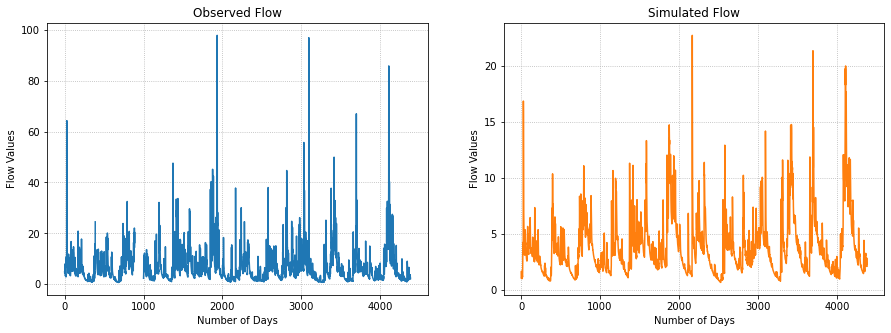

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,5))

# Let us visualize the observed flow
plt.subplot(121); plt.grid(linestyle=':')
plt.plot(obs['Obs'],'C0'); plt.title('Observed Flow')
plt.xlabel('Number of Days'); plt.ylabel('Flow Values');

# Let us visualize the first simulated flow
plt.subplot(122); plt.grid(linestyle=':')
plt.plot(sim['Sim1'],'C1'); plt.title('Simulated Flow')
plt.xlabel('Number of Days'); plt.ylabel('Flow Values');

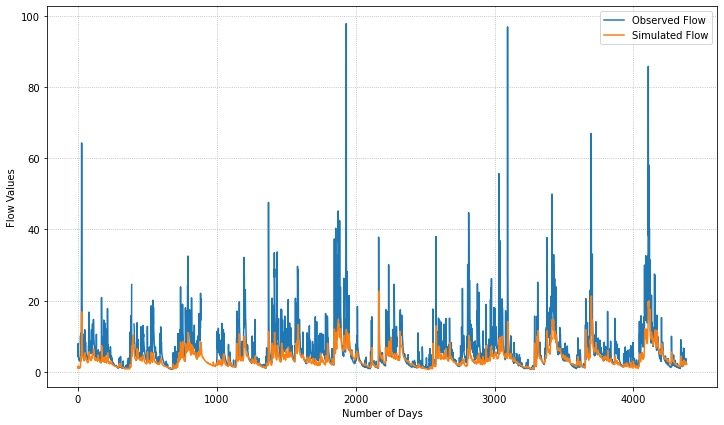

In [45]:
# Let us plot the observed flow and one of the simulated flows on the same axis
plt.figure(figsize=(12,7)); plt.grid(linestyle=':')
plt.plot(obs['Obs']); plt.plot(sim['Sim1']);
plt.xlabel('Number of Days'); plt.ylabel('Flow Values');
plt.legend(['Observed Flow','Simulated Flow']);

In [46]:
from hydroeval import evaluator, nse
# Option 1
my_nse = evaluator(nse, sim_flow, obs_flow, axis=1)
print(my_nse.shape);print()
print(my_nse)

(20,)

[0.34650485 0.48347442 0.57372786 0.29326951 0.06721032 0.28481577
 0.27193062 0.1893216  0.18454516 0.21669699 0.04644772 0.28255908
 0.24668152 0.41708731 0.23750513 0.08981919 0.0703528  0.12854737
 0.17265806 0.12465132]


In [47]:
from hydroeval import evaluator, nse
# Option 2
my_nse = evaluator(nse, sim_flow.T, obs_flow, axis=0)
print(my_nse.shape);print()
print(my_nse)

(20,)

[0.34650485 0.48347442 0.57372786 0.29326951 0.06721032 0.28481577
 0.27193062 0.1893216  0.18454516 0.21669699 0.04644772 0.28255908
 0.24668152 0.41708731 0.23750513 0.08981919 0.0703528  0.12854737
 0.17265806 0.12465132]


In [48]:
from hydroeval import evaluator, pbias
my_pbias = evaluator(pbias, sim_flow.T, obs_flow, axis=0)
print(my_pbias.shape);print()
print(my_pbias)

(20,)

[36.99560634 25.17760969 26.62860589 22.73219296 37.13524972 31.43248448
 32.63856329 40.16481881 33.04490644 18.91459483 40.80459426 37.69284099
 29.21642354 24.56146881 38.84919923 39.59894459 40.83678439 29.79948435
 33.9632639  36.56741869]


In [49]:
from hydroeval import evaluator, kge
my_kge = evaluator(kge, sim_flow.T, obs_flow, axis=0, transform='inv')
print(my_kge.shape); print()
print(my_kge.T)

(4, 20)

[[ 0.72655085  0.84278148  0.95663828  1.21949153]
 [ 0.69359436  0.82909217  0.77088183  1.1103621 ]
 [ 0.69464254  0.88615611  1.06486166  1.27581826]
 [ 0.4026046   0.76572319  0.46967667  0.85594161]
 [ 0.47684932  0.69981561  0.57169139  1.01130082]
 [ 0.59187085  0.82761726  0.63006371  1.00085609]
 [ 0.56981159  0.79002983  0.62745464  1.04673923]
 [ 0.66234345  0.81660368  1.03555071  1.2812719 ]
 [ 0.63547134  0.78430251  0.70844913  1.0367943 ]
 [ 0.28199002  0.72392735  0.38152599  0.76164706]
 [ 0.61524389  0.70053385  1.01819038  1.24088669]
 [ 0.27542536  0.78426453  1.55650342  1.41081694]
 [ 0.53529427  0.80312475  0.58137947  0.95585918]
 [-0.5506992   0.81030731  2.37522769  1.69096561]
 [ 0.61241577  0.82226284  1.14141107  1.31406042]
 [ 0.58463628  0.70478964  0.73041862  1.11271087]
 [ 0.39411239  0.62382061  0.53138185  1.07736858]
 [ 0.44531708  0.71886087  0.52910125  0.91700421]
 [ 0.6412585   0.77258124  0.72548819  1.04024222]
 [ 0.44407677  0.75253